In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
features = iris['data']
feature_names = iris['feature_names']
label = iris['target']
df = pd.DataFrame(features, columns = feature_names)
df['target'] = label

In [3]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# 01 Correlation Analysis

## 1-1 Data exploration
(어떤 feature들이 correlation이 강한지 알기 위해서!)

### (1) sepal length ~ sepal width 

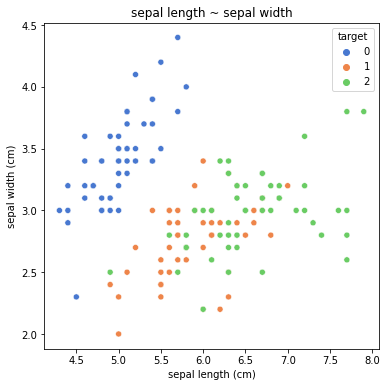

In [4]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)',
                hue=df['target'], palette='muted')
plt.title('sepal length ~ sepal width')
plt.show()

### (2) petal length ~ petal width

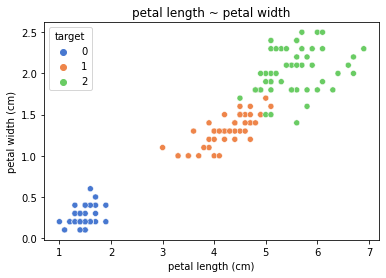

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)',
                hue=df['target'], palette='muted')
plt.title('petal length ~ petal width')
plt.show()

## 1-2 Pearson correlation

### (1) scipy

In [6]:
from scipy.stats import pearsonr

In [7]:
df['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [8]:
# sepal length ~ sepal width
pearsonr(df['sepal length (cm)'], df['sepal width (cm)'])

PearsonRResult(statistic=-0.11756978413300208, pvalue=0.15189826071144746)

In [9]:
# petal length ~ petal width
pearsonr(df['petal length (cm)'], df['petal width (cm)'])

PearsonRResult(statistic=0.9628654314027963, pvalue=4.675003907324556e-86)

### (2) numpy

In [11]:
# sepal length ~ sepal width
np.corrcoef(df['sepal length (cm)'], df['sepal width (cm)'])[0][1]

-0.11756978413300198

In [12]:
# petal length ~ petal width
np.corrcoef(df['petal length (cm)'], df['petal width (cm)'])[0][1]

0.9628654314027963

### (3) pandas

In [16]:
# iloc (index로 location)
df_sepal = df.iloc[:, :2]

In [17]:
df_sepal.corr(method='pearson')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [20]:
df_petal = df.iloc[:, 2:4]

In [21]:
df_petal.corr(method='pearson')

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.962865
petal width (cm),0.962865,1.000000


### (4) visualization

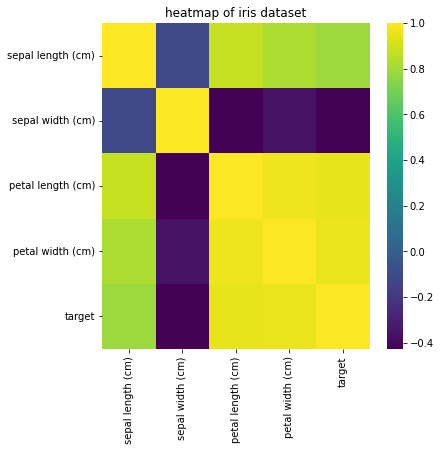

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(method='pearson'), cmap = 'viridis')
plt.title('heatmap of iris dataset')
plt.show()

In [23]:
df_without_target = df.drop(['target'], axis=1)

In [24]:
df_without_target.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


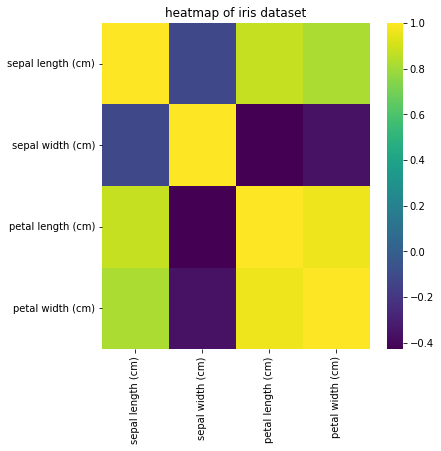

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(df_without_target.corr(method='pearson'), cmap = 'viridis')
plt.title('heatmap of iris dataset')
plt.show()

<Figure size 432x432 with 0 Axes>

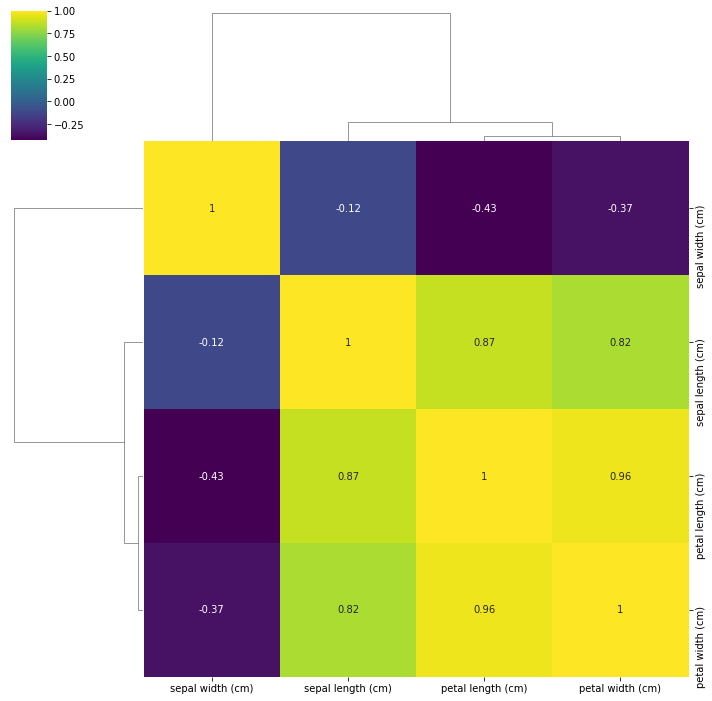

In [28]:
plt.figure(figsize=(6,6))
sns.clustermap(df_without_target.corr(method='pearson'), annot=True, cmap = 'viridis')
plt.show()

## 1-3 Spearman Correlation

### (1) scipy

In [29]:
from scipy.stats import spearmanr

In [30]:
# sepal length ~ sepal width
spearmanr(df['sepal length (cm)'], df['sepal width (cm)'])

SignificanceResult(statistic=-0.166777658283235, pvalue=0.04136799424884587)

In [31]:
# petal length ~ petal width
spearmanr(df['petal length (cm)'], df['petal width (cm)'])

SignificanceResult(statistic=0.9376668235763412, pvalue=8.156596854126675e-70)

### (2) pandas

In [32]:
df_sepal.corr(method='spearman')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.000000,-0.166778
sepal width (cm),-0.166778,1.000000


In [33]:
df_petal.corr(method='spearman')

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.937667
petal width (cm),0.937667,1.000000


### (3) visualization

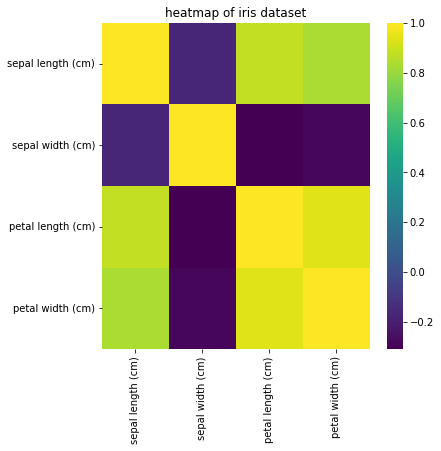

In [34]:
plt.figure(figsize=(6,6))
sns.heatmap(df_without_target.corr(method='spearman'), cmap = 'viridis')
plt.title('heatmap of iris dataset')
plt.show()

<Figure size 432x432 with 0 Axes>

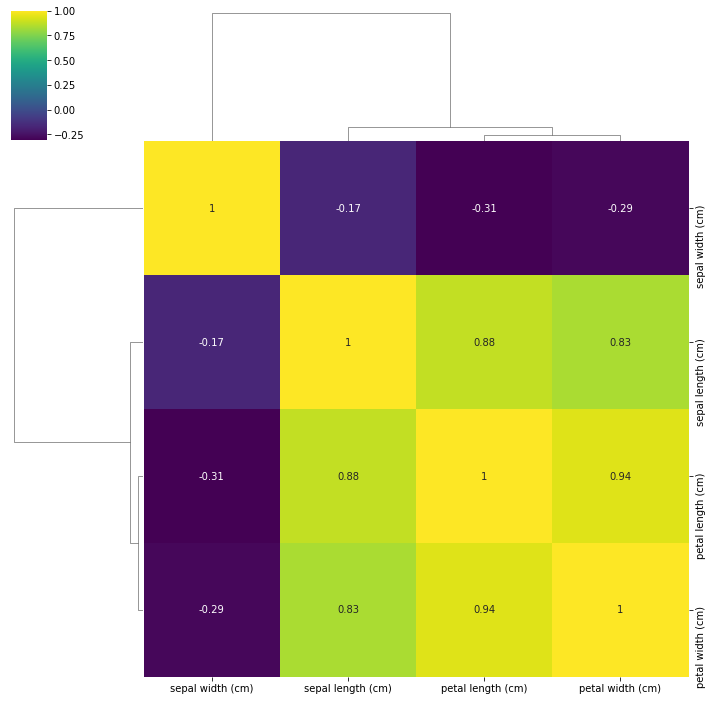

In [35]:
plt.figure(figsize=(6,6))
sns.clustermap(df_without_target.corr(method='spearman'), annot=True, cmap = 'viridis')
plt.show()

# 02 normality test

## 2-1 data 제작

In [73]:
np.random.normal(loc=1, scale=2, size=1000) # 할 때마다 수가 바껴요!

array([-5.65832968e-01,  2.44435560e+00, -7.91562375e-01,  2.31621479e+00,
        1.54265625e+00, -7.75762707e-01,  3.12271845e+00, -7.59268838e-01,
        2.83030944e-01,  2.48930332e+00,  3.00601379e+00,  1.16216501e-01,
        2.11503683e+00,  2.88987808e+00,  1.22020955e+00, -1.01837915e+00,
       -1.29159325e+00, -6.18578452e-01,  3.34600391e+00,  1.91134216e+00,
        1.55561624e+00, -5.84553631e-01, -2.74859568e+00,  7.48342430e-01,
       -1.02735062e+00,  4.14816989e+00, -1.30033094e+00,  6.55935497e-01,
        2.33522829e+00, -1.65633841e+00,  4.01267794e+00,  1.56334475e+00,
        2.76365988e+00,  1.73936390e+00,  1.09516861e+00, -5.03332997e-01,
        1.55748385e+00, -1.54837881e+00,  1.22861001e+00,  3.75366271e-01,
        1.19872116e+00,  2.76323513e+00,  1.96042815e+00,  2.44599014e+00,
        5.81971818e-01, -1.95150657e-01,  6.48087165e-01,  3.79343595e+00,
        3.18667830e+00, -1.31532022e+00,  1.65559912e+00,  1.76843056e+00,
        5.04599001e-01,  

In [36]:
# numpy의 random 모듈!
rand_normal = np.random.normal(loc=1, scale=2, size=1000)

In [38]:
rand_uniform = np.random.uniform(low=0, high=2, size=1000)

In [39]:
rand_f = np.random.f(dfnum=10, dfden=10, size=1000)

## 2-2 data plotting

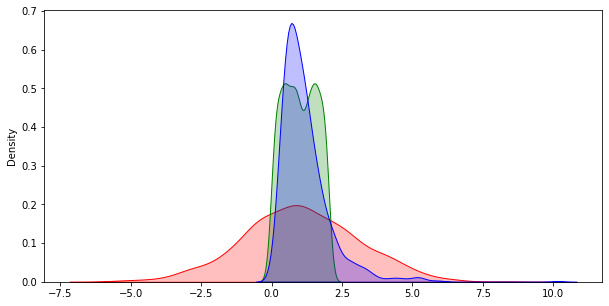

In [42]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=rand_normal, color='red', fill=True)
sns.kdeplot(data=rand_uniform, color='green', fill=True)
sns.kdeplot(data=rand_f, color='blue', fill=True)

plt.show()

## 2-3 QQplot

In [43]:
import scipy.stats as stats

C:\Users\stell\AppData\Local\Temp/ipykernel_28232/1668094587.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=rand_uniform, color='red', label = 'uniform distribution')


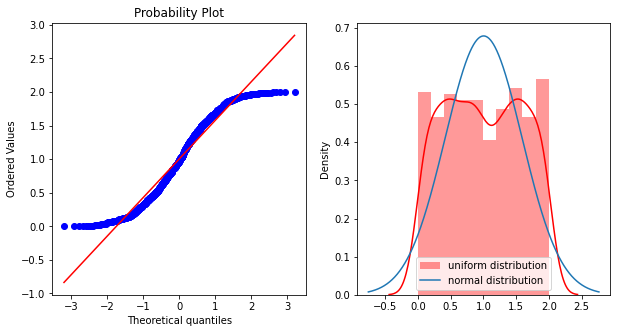

In [50]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

## QQ plot
stats.probplot(rand_uniform, dist=stats.norm, plot=ax1)

## normal distribution vs. uniform distribution

# uniform distribution
sns.distplot(ax=ax2, a=rand_uniform, color='red', label = 'uniform distribution')

# normal distribution
mu = rand_uniform.mean() # average!! 그리스문자 뮤!
variance = rand_uniform.var()
std = variance**0.5

x = np.linspace(mu-3*std, mu+3*std, 1000)
ax2.plot(x, stats.norm.pdf(x, mu, std), label = 'normal distribution')

ax2.legend()

plt.show()

## 2-4 Kolmogorov-Sminorv Test
- H0 (null hypothesis) : 표본이 정규분포를 따른다!
- KS test 결과 p value가 0.05보다 작으면 H0을 reject 함 -> 표본이 정규분포를 따르지 않는다.
- KS test 결과 p value가 0.05보다 크면 H0을 reject 하지 못함 -> 표본이 정규분포를 따른다.

In [51]:
stats.kstest(rand_normal, 'norm', args=(rand_normal.mean(), rand_normal.var()**0.5))

KstestResult(statistic=0.025404459013470326, pvalue=0.5302652017703785, statistic_location=1.2136837949232113, statistic_sign=1)

In [52]:
stats.kstest(rand_uniform, 'norm', args=(rand_uniform.mean(), rand_uniform.var()**0.5))

KstestResult(statistic=0.07035772725777767, pvalue=9.487412610036951e-05, statistic_location=1.4903017176686002, statistic_sign=-1)

In [53]:
stats.kstest(rand_f, 'norm', args=(rand_f.mean(), rand_f.var()**0.5))

KstestResult(statistic=0.1383886047627596, pvalue=3.6160430809540094e-17, statistic_location=1.2965657298682371, statistic_sign=1)

## 2-5 Shapiro-Wilk Test
- H0 (null hypothesis) : 표본이 정규분포를 따른다!
- Shapiro test 결과 p value가 0.05보다 작으면 H0을 reject 함 -> 표본이 정규분포를 따르지 않는다.
- Shapiro test 결과 p value가 0.05보다 크면 H0을 reject 하지 못함 -> 표본이 정규분포를 따른다.

In [54]:
stats.shapiro(rand_normal)

ShapiroResult(statistic=0.9985450506210327, pvalue=0.5843108296394348)

In [55]:
stats.shapiro(rand_uniform)

ShapiroResult(statistic=0.9507490992546082, pvalue=8.776695664736718e-18)

In [56]:
stats.shapiro(rand_f)

ShapiroResult(statistic=0.7838470339775085, pvalue=2.198961007062271e-34)